<h1 style="border: 2px solid black; padding: 15px; border-radius: 12px;" align='center'>Bitcoin with EUR and Cor with Ehereum</h1>
<h2 align='center'> Universidade Da Coruña </h2>
<h2 align='center'> Master HPC </h2>
<h3 align='center'> High Performance Data Analytics </h3>
<h4 align='center'> By SARHANE Moataz Billah </h4>



### In this notebook we will compare firstly the price with bitcoin and ethereum during the last 10 years and we will see their correlation and then will create a model to train it based on the historical data to predict with the values of the bitcoin ( simulation ).

In [18]:
!pip install scikit-learn --upgrade

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the BTC-EUR and ETH-EUR data from a CSV file brought from yahoo finance with the index of the dates to compare fairly.
btc = pd.read_csv('BTC-EUR.csv',index_col='Date',parse_dates=True)
eth = pd.read_csv('ETH-EUR.csv',index_col='Date',parse_dates=True)

df = pd.read_csv('BTC-EUR.csv') # will be used for the model only


In [19]:
pd.DataFrame(btc) # to see our Inputs and Output in our case the Target is column 'Close'

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625
...,...,...,...,...,...,...
2024-03-30,65552.343750,65781.187500,64015.406250,64714.957031,64714.957031,23361674571
2024-03-31,64715.527344,65143.347656,64444.808594,64485.773438,64485.773438,15861182173
2024-04-01,64488.062500,66131.085938,64466.847656,66090.195313,66090.195313,18577076876


### Describe our data set to see the important statistics and also to see if we have NaN values by checking the count and the shape

In [20]:
summary = pd.DataFrame(df.describe())
summary = (
    summary.style.background_gradient()
    .set_table_attributes("style = 'display: inline'")
    .set_caption("Statistics of the Dataset")
    .set_table_styles([{"selector": "caption", "props": [("font-size", "16px")]}])
)
summary

,Open,High,Low,Close,Adj Close,Volume
count,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000
mean,13899.469622,14217.616833,13565.985811,13916.510458,13916.510458,15135930240.142242
std,15261.186139,15619.666769,14882.767597,15281.549581,15281.549581,16847192156.364525
min,150.128998,183.047470,145.483078,151.152512,151.152512,4640334.000000
25%,938.145477,953.878174,909.910736,940.680725,940.680725,188355565.500000
50%,7516.129395,7674.700684,7301.193359,7525.158203,7525.158203,11327874247.000000
75%,24499.693360,24857.394531,23983.091797,24525.445313,24525.445313,25041282605.000000
max,66720.078125,67416.492188,65274.687500,66723.851563,66723.851563,290727102068.000000


In [21]:
print(btc.shape)
print(eth.shape)

(3487, 6)
(2336, 6)


### Evolution of Bitcoin against Euro since in the past 10 years

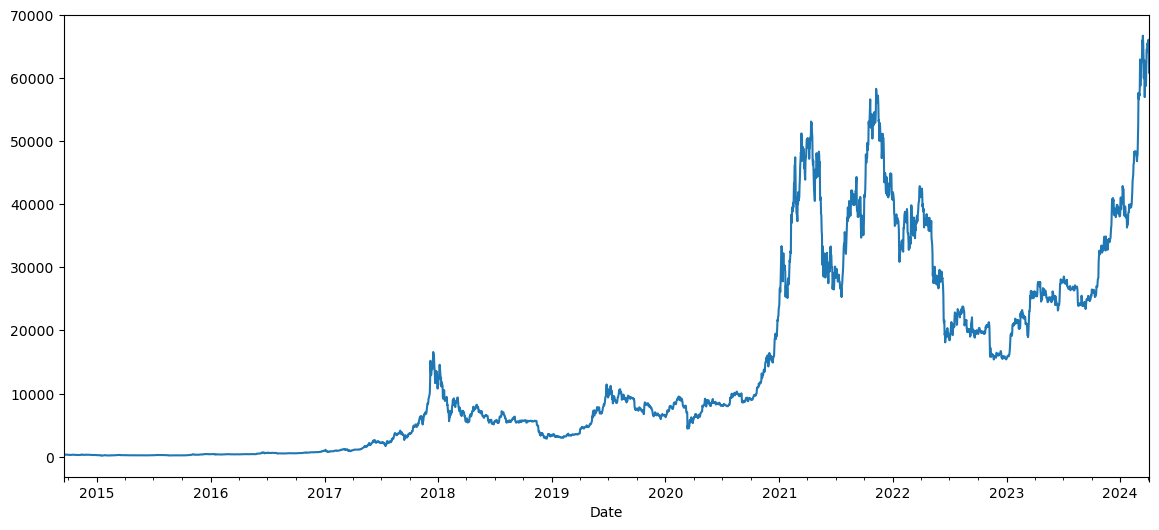

In [22]:

btc['Close'].plot(figsize=(14,6))
plt.show()

### Calculating the Moving Average ( MA ) of the Bitcoin every month during the last year till now and centring it

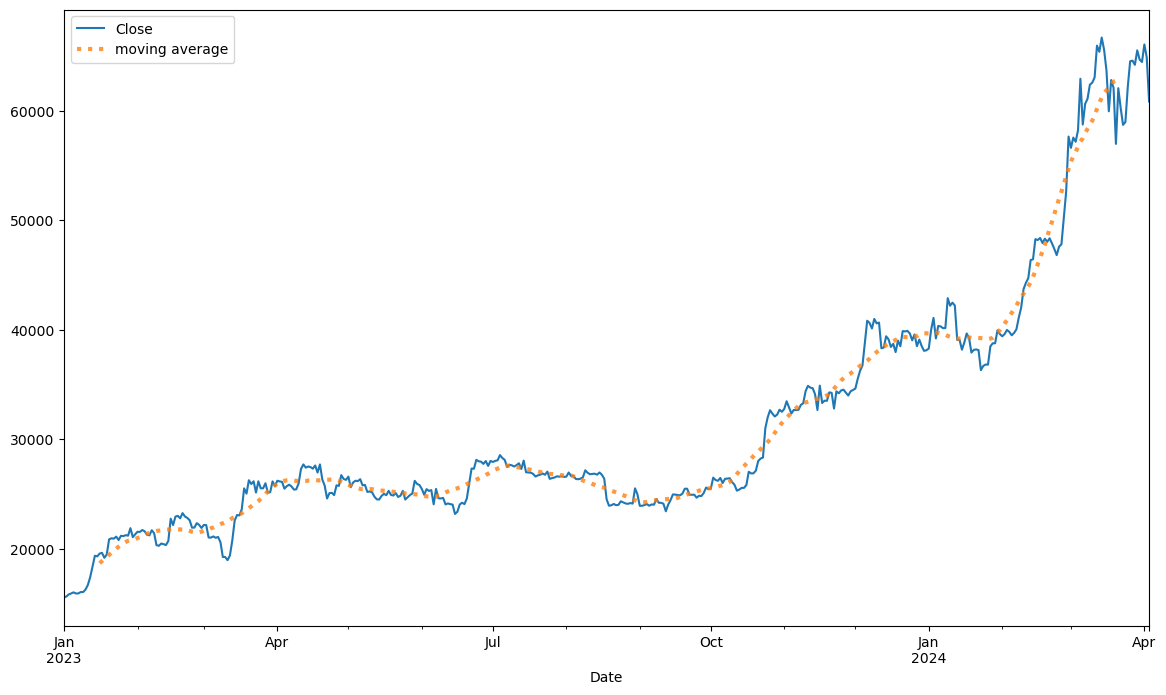

In [23]:
plt.figure(figsize=(14,8))
btc.loc['2023':'2024-04','Close'].plot()
btc.loc['2023' : '2024-04','Close'].rolling(window=30,center=True).mean().plot(label='moving average',lw=3,ls=':',alpha=0.8)
plt.legend()
plt.show()

### Merge the Bitcoin and Ethereum to calculate their matrix of correlation and to show the evolution of their graphs

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

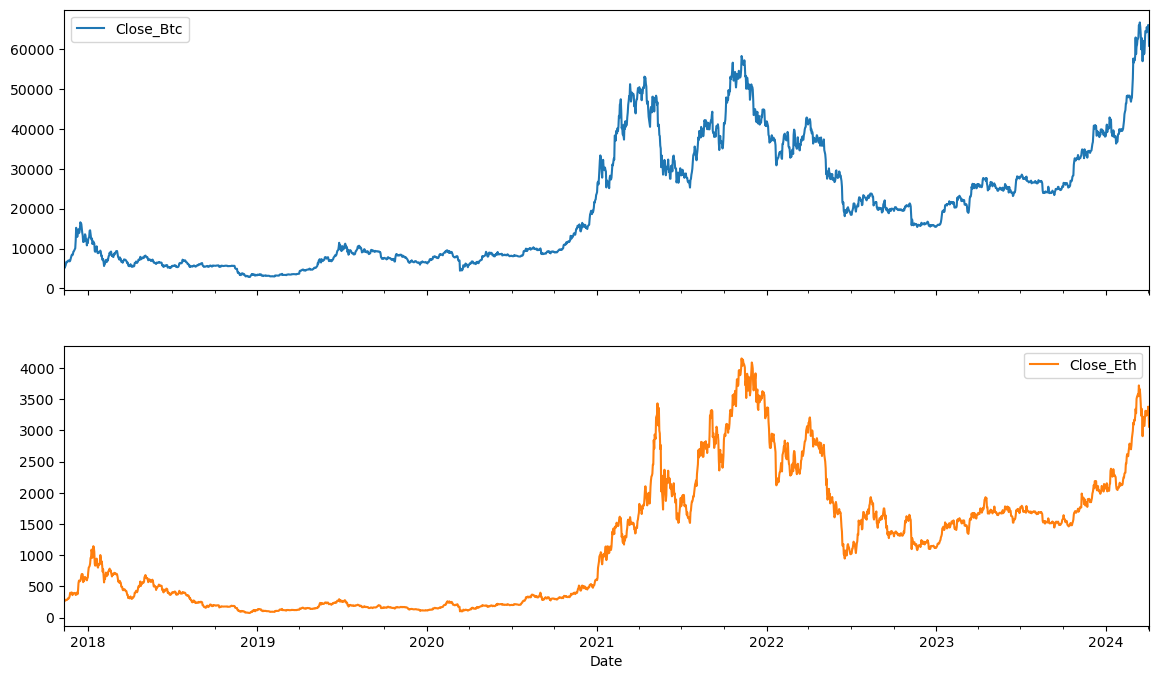

In [24]:
btc_eth = pd.merge(btc,eth,on='Date',how='inner',suffixes=('_Btc','_Eth')) # using inner methode since the we don't have the same shape of Eth as Btc
btc_eth[['Close_Btc','Close_Eth']].plot(subplots=True,figsize=(14,8))

In [25]:
btc_eth[['Close_Btc','Close_Eth']].corr()

,Close_Btc,Close_Eth
Close_Btc,1.000000,0.932996
Close_Eth,0.932996,1.000000


### As we see from the graph and the corr matrix that the corr between the Btc and Eth is : 0.932 which means they are very related to each rather they r influenced with the same Econimics/Politics crisis

### Feature Engineering 

In [26]:

lagged_df = pd.DataFrame()

for lag in range(1, 16):
    lagged_df["close_lag_" + str(lag)] = df["Close"].shift(lag)

lagged_df.dropna(inplace=True)


In [27]:
lagged_df

,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7,close_lag_8,close_lag_9,close_lag_10,close_lag_11,close_lag_12,close_lag_13,close_lag_14,close_lag_15
15,303.949768,306.417480,295.899597,297.578705,315.029175,318.896851,322.676605,331.250000,339.189758,312.958771,310.632446,318.758972,307.761139,328.539368,355.957367
16,296.054932,303.949768,306.417480,295.899597,297.578705,315.029175,318.896851,322.676605,331.250000,339.189758,312.958771,310.632446,318.758972,307.761139,328.539368
17,287.264862,296.054932,303.949768,306.417480,295.899597,297.578705,315.029175,318.896851,322.676605,331.250000,339.189758,312.958771,310.632446,318.758972,307.761139
18,262.777466,287.264862,296.054932,303.949768,306.417480,295.899597,297.578705,315.029175,318.896851,322.676605,331.250000,339.189758,312.958771,310.632446,318.758972
19,256.162079,262.777466,287.264862,296.054932,303.949768,306.417480,295.899597,297.578705,315.029175,318.896851,322.676605,331.250000,339.189758,312.958771,310.632446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,65552.484375,64228.828125,64607.664063,64555.195313,62211.914063,58998.085938,58737.050781,60291.375000,62092.179688,56999.375000,62122.750000,62838.261719,59975.605469,63730.011719,65603.539063
3483,64714.957031,65552.484375,64228.828125,64607.664063,64555.195313,62211.914063,58998.085938,58737.050781,60291.375000,62092.179688,56999.375000,62122.750000,62838.261719,59975.605469,63730.011719
3484,64485.773438,64714.957031,65552.484375,64228.828125,64607.664063,64555.195313,62211.914063,58998.085938,58737.050781,60291.375000,62092.179688,56999.375000,62122.750000,62838.261719,59975.605469
3485,66090.195313,64485.773438,64714.957031,65552.484375,64228.828125,64607.664063,64555.195313,62211.914063,58998.085938,58737.050781,60291.375000,62092.179688,56999.375000,62122.750000,62838.261719


### Split train test

In [28]:
lagged_df = lagged_df.dropna()
X = lagged_df
y = df["Close"][15:]
print("X shape: {}\ny shape: {}".format(X.shape, y.shape))

X shape: (3472, 15)
y shape: (3472,)


In [29]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=3,  # to keep the notebook fast enough on common laptops
    gap=2,  # 2 days data gap between train and test
    max_train_size=10000,  # keep train sets of comparable sizes
    test_size=300,  # for 2 or 3 digits of precision in scores
)
all_splits = list(ts_cv.split(X, y))

In [ ]:
### Testing simple models with their Mean Absolute Error

In [30]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error

train_idx, test_idx = all_splits[0]
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

model = HistGradientBoostingRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

0.0682930449133029

### Testing Multiple model paramters (Grident Boosting Regressor)

In [31]:
from collections import defaultdict
from sklearn.metrics import (
    make_scorer,
    mean_absolute_error,
    mean_pinball_loss,
    root_mean_squared_error,
)
from sklearn.model_selection import cross_validate


def consolidate_scores(cv_results, scores, metric):
    if metric == "MAPE":
        scores[metric].append(f"{value.mean():.2f} ± {value.std():.2f}")
    else:
        scores[metric].append(f"{value.mean():.1f} ± {value.std():.1f}")

    return scores


scoring = {
    "MAPE": make_scorer(mean_absolute_percentage_error),
    "RMSE": make_scorer(root_mean_squared_error),
    "MAE": make_scorer(mean_absolute_error),
    "pinball_loss_05": make_scorer(mean_pinball_loss, alpha=0.05),
    "pinball_loss_50": make_scorer(mean_pinball_loss, alpha=0.50),
    "pinball_loss_95": make_scorer(mean_pinball_loss, alpha=0.95),
}
loss_functions = ["squared_error", "poisson", "absolute_error"]
scores = defaultdict(list)
for loss_func in loss_functions:
    model = HistGradientBoostingRegressor(loss=loss_func)
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=ts_cv,
        scoring=scoring,
        n_jobs=2,
    )
    time = cv_results["fit_time"]
    scores["loss"].append(loss_func)
    scores["fit_time"].append(f"{time.mean():.2f} ± {time.std():.2f} s")

    for key, value in cv_results.items():
        if key.startswith("test_"):
            metric = key.split("test_")[1]
            scores = consolidate_scores(cv_results, scores, metric)

### Print the above results in a table to read !

In [32]:
quantile_list = [0.05, 0.5, 0.95]

for quantile in quantile_list:
    model = HistGradientBoostingRegressor(loss="quantile", quantile=quantile)
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=ts_cv,
        scoring=scoring,
        n_jobs=2,
    )
    time = cv_results["fit_time"]
    scores["fit_time"].append(f"{time.mean():.2f} ± {time.std():.2f} s")

    scores["loss"].append(f"quantile {int(quantile*100)}")
    for key, value in cv_results.items():
        if key.startswith("test_"):
            metric = key.split("test_")[1]
            scores = consolidate_scores(cv_results, scores, metric)

df = pd.DataFrame(scores)

styled_df_copy = df.copy()


def extract_numeric(value):
    parts = value.split("±")
    mean_value = float(parts[0])
    std_value = float(parts[1].split()[0])

    return mean_value, std_value


# Convert columns containing "±" to tuples of numerical values
cols_to_convert = df.columns[1:]  # Exclude the "loss" column
for col in cols_to_convert:
    df[col] = df[col].apply(extract_numeric)

min_values = df.min()

# Create a mask for highlighting minimum values
mask = pd.DataFrame("", index=df.index, columns=df.columns)
for col in cols_to_convert:
    mask[col] = df[col].apply(
        lambda x: "font-weight: bold" if x == min_values[col] else ""
    )

styled_df_copy = styled_df_copy.style.apply(lambda x: mask, axis=None)
styled_df_copy

,loss,fit_time,MAPE,RMSE,MAE,pinball_loss_05,pinball_loss_50,pinball_loss_95
0,squared_error,0.69 ± 0.24 s,0.05 ± 0.02,2164.4 ± 830.6,1449.5 ± 529.2,802.0 ± 468.7,724.7 ± 264.6,647.5 ± 412.5
1,poisson,0.76 ± 0.28 s,0.05 ± 0.01,2130.6 ± 795.5,1432.4 ± 493.6,793.5 ± 436.2,716.2 ± 246.8,638.9 ± 410.9
2,absolute_error,0.83 ± 0.28 s,0.04 ± 0.00,1991.7 ± 896.9,1224.3 ± 398.4,523.2 ± 181.2,612.1 ± 199.2,701.1 ± 435.6
3,quantile 5,0.83 ± 0.24 s,0.10 ± 0.03,4648.3 ± 2292.6,3536.6 ± 1741.7,291.2 ± 32.1,1768.3 ± 870.8,3245.5 ± 1712.4
4,quantile 50,0.91 ± 0.22 s,0.04 ± 0.00,1991.7 ± 896.9,1224.3 ± 398.4,523.2 ± 181.2,612.1 ± 199.2,701.1 ± 435.6
5,quantile 95,0.77 ± 0.17 s,0.09 ± 0.03,3052.5 ± 347.7,2492.6 ± 429.4,2101.1 ± 602.7,1246.3 ± 214.7,391.6 ± 228.6


### Graph to visualise the model predections !

In [33]:
import matplotlib.pyplot as plt

all_splits = list(ts_cv.split(X, y))
train_idx, test_idx = all_splits[0]

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

max_iter = 50
gbrt_mean_poisson = HistGradientBoostingRegressor(loss="poisson", max_iter=max_iter)
gbrt_mean_poisson.fit(X_train, y_train)
mean_predictions = gbrt_mean_poisson.predict(X_test)

gbrt_median = HistGradientBoostingRegressor(
    loss="quantile", quantile=0.5, max_iter=max_iter
)
gbrt_median.fit(X_train, y_train)
median_predictions = gbrt_median.predict(X_test)

gbrt_percentile_5 = HistGradientBoostingRegressor(
    loss="quantile", quantile=0.05, max_iter=max_iter
)
gbrt_percentile_5.fit(X_train, y_train)
percentile_5_predictions = gbrt_percentile_5.predict(X_test)

gbrt_percentile_95 = HistGradientBoostingRegressor(
    loss="quantile", quantile=0.50, max_iter=max_iter
)
gbrt_percentile_95.fit(X_train, y_train)
percentile_95_predictions = gbrt_percentile_95.predict(X_test)

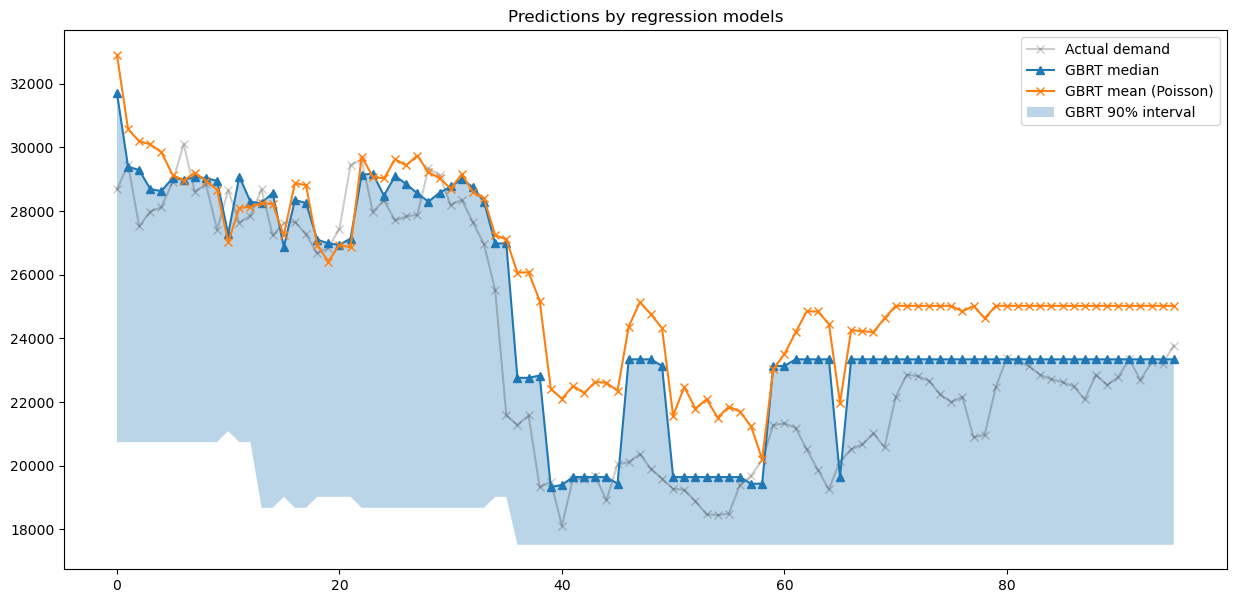

In [34]:
last_hours = slice(-96, None)
fig, ax = plt.subplots(figsize=(15, 7))
plt.title("Predictions by regression models")
ax.plot(
    y_test.values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual demand",
    color="black",
)
ax.plot(
    median_predictions[last_hours],
    "^-",
    label="GBRT median",
)
ax.plot(
    mean_predictions[last_hours],
    "x-",
    label="GBRT mean (Poisson)",
)
ax.fill_between(
    np.arange(96),
    percentile_5_predictions[last_hours],
    percentile_95_predictions[last_hours],
    alpha=0.3,
    label="GBRT 90% interval",
)
_ = ax.legend()

                        # Conclusion after running the models.
    ## After applying the Gradient Boosting Regressor on our model since we are dealing with values we have applied different models to predict closely to the feature value of the Bitcoin but though we can't have a good accuracy ( Monthly) because it's quit unpredictable due to many factors (Economics/Politics/Wars/High Demand etc....) but from our small testing we can assume that the GBRT Median is the closest model between them that can reduce our loss if we applied it for real testing.